## Business Case: Yulu - Hypothesis Testing

# 1. Introduction

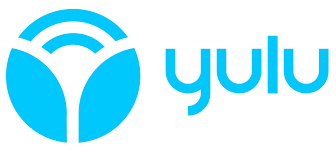

Yulu is India’s leading ***micro-mobility service provider***, which ***offers unique vehicles for the daily commute***. Starting off as a ***mission to eliminate traffic congestion in India***, Yulu provides the safest commute solution through a ***user-friendly mobile app to enable shared, solo and sustainable commuting.***

***Yulu zones*** are located at all the appropriate locations (including ***metro stations, bus stands, office spaces, residential areas, corporate offices, etc***) to make those first and last miles smooth, affordable, and convenient!

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want ***to understand the factors affecting the demand for these shared electric cycles in the Indian market***.

## Column Profiling:

datetime: datetime

`season:` season (1: spring, 2: summer, 3: fall, 4: winter)

`holiday:` whether day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)

`workingday:` if day is neither weekend nor holiday is 1, otherwise is 0.

`weather:` 1: Clear, Few clouds, partly cloudy, partly cloudy 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

`temp:` temperature in Celsius

`atemp:` feeling temperature in Celsius

`humidity:` humidity

`windspeed:` wind speed

`casual:` count of casual users

`registered:` count of registered users

`count:` count of total rental bikes including both casual and registered

## Problem Statement

The company wants to know:
 - **Which variables are significant in predicting the demand for shared electric cycles in the Indian market?**
 
 - **How well those variables describe the electric cycle demands**

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy.stats as spy
print("Setup Complete!")

Setup Complete!


#### Getting data

In [3]:
yulu_df = pd.read_csv(r"D:\DSML\Case Studies\Yulu Case Study\bike_sharing.csv")
yulu_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
yulu_df.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


#### Shape of Dataframe

In [5]:
yulu_df.shape

(10886, 12)

#### Column Infomration

In [6]:
yulu_df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

#### Checking Null Values and Duplicate Entries

In [7]:
yulu_df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [8]:
yulu_df.duplicated().sum()

0

#### Datatype for Columns

In [9]:
yulu_df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

#### Checking the timefram for which the data belongs to

In [10]:
yulu_df['datetime'] = pd.to_datetime(yulu_df['datetime'])

In [11]:
print("Start of the time => ",yulu_df['datetime'].min())
print("End of the time => ",yulu_df['datetime'].max())

Start of the time =>  2011-01-01 00:00:00
End of the time =>  2012-12-19 23:00:00


In [12]:
print("The data is for {} days".format(yulu_df['datetime'].max() - yulu_df['datetime'].min()))

The data is for 718 days 23:00:00 days


In [13]:
yulu_df['day'] = yulu_df['datetime'].dt.day_name()

In [14]:
yulu_df.set_index('datetime', inplace = True)  # changing the datatime column as index for the entire dataframe for better control 

#### Visualizing the data based on timeframes 

In [15]:
colors = {
    'casual': '#2FCDFD',
    'registered': '#FFD700', 
    'count': '#000000'
}

C:\Users\tripa\AppData\Local\Temp\ipykernel_9340\3017390436.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  yulu_df.resample('M')['casual'].mean().plot(kind='line', legend='casual', marker='o', color=colors['casual'])
C:\Users\tripa\AppData\Local\Temp\ipykernel_9340\3017390436.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  yulu_df.resample('M')['registered'].mean().plot(kind='line', legend='registered', marker='o', color=colors['registered'])
C:\Users\tripa\AppData\Local\Temp\ipykernel_9340\3017390436.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  yulu_df.resample('M')['count'].mean().plot(kind='line', legend='count', marker='o', color=colors['count'])


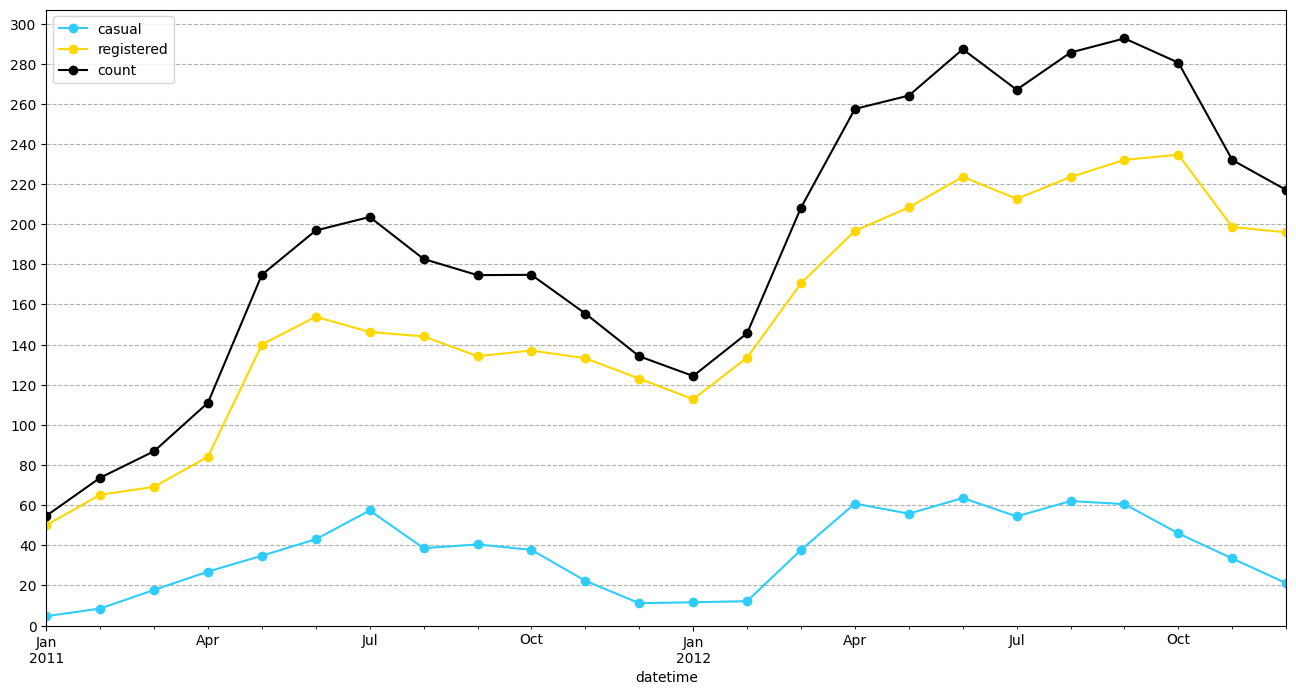

In [16]:
plt.figure(figsize = (16, 8))

yulu_df.resample('M')['casual'].mean().plot(kind='line', legend='casual', marker='o', color=colors['casual'])
yulu_df.resample('M')['registered'].mean().plot(kind='line', legend='registered', marker='o', color=colors['registered'])
yulu_df.resample('M')['count'].mean().plot(kind='line', legend='count', marker='o', color=colors['count'])

plt.grid(axis='y', linestyle='--')
plt.yticks(np.arange(0, 301, 20))
plt.ylim(0,)
plt.show()

In [17]:
# resampling the DataFrame by the year 
df1 = yulu_df.resample('Y')['count'].mean().to_frame().reset_index()

# Create a new column 'prev_count' by shifting the 'count' column one position up 
    # to compare the previous year's count with the current year's count
df1['prev_count'] = df1['count'].shift(1) 

# Calculating the growth percentage of 'count' with respect to the 'count' of previous year
df1['growth_percent'] = (df1['count'] - df1['prev_count']) * 100 / df1['prev_count']
df1

C:\Users\tripa\AppData\Local\Temp\ipykernel_9340\2388866687.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df1 = yulu_df.resample('Y')['count'].mean().to_frame().reset_index()


,datetime,count,prev_count,growth_percent
0,2011-12-31,144.223349,NaN,NaN
1,2012-12-31,238.560944,144.223349,65.410764


## Observations 

 - This data suggests that there was substantial growth in the count of the variable over the course of one year.
 - The mean total hourly count of rental bikes is 144 for the year 2011 and 239 for the year 2012. An annual growth rate of 65.41 % can be seen in the demand of electric vehicles on an hourly basis.
 
*It indicates positive growth and potentially a successful outcome or increasing demand for the variable being measured.*

In [18]:
yulu_df.reset_index(inplace = True)

In [19]:
df1 = yulu_df.groupby(by = yulu_df['datetime'].dt.month)['count'].mean().reset_index()
df1.rename(columns = {'datetime' : 'month'}, inplace = True)

# Create a new column 'prev_count' by shifting the 'count' column one position up 
    # to compare the previous month's count with the current month's count
df1['prev_count'] = df1['count'].shift(1) 

# Calculating the growth percentage of 'count' with respect to the 'count' of previous month
df1['growth_percent'] = (df1['count'] - df1['prev_count']) * 100 / df1['prev_count']
df1.set_index('month', inplace = True)
df1

,count,prev_count,growth_percent
month,,,
1,90.366516,NaN,NaN
2,110.003330,90.366516,21.730188
3,148.169811,110.003330,34.695751
4,184.160616,148.169811,24.290241
5,219.459430,184.160616,19.167406
6,242.031798,219.459430,10.285440
7,235.325658,242.031798,-2.770768
8,234.118421,235.325658,-0.513007
9,233.805281,234.118421,-0.133753


## Observations 

 - The count of rental bikes shows an increasing trend from January to March, with a significant growth rate of 34.70% between February and March.
 - The growth rate starts to stabilize from April to June, with a relatively smaller growth rate.
 - From July to September, there is a slight decrease in the count of rental bikes, with negative growth rates.
 - The count further declines from October to December, with the largest drop observed between October and November (-14.94%).
 

[]

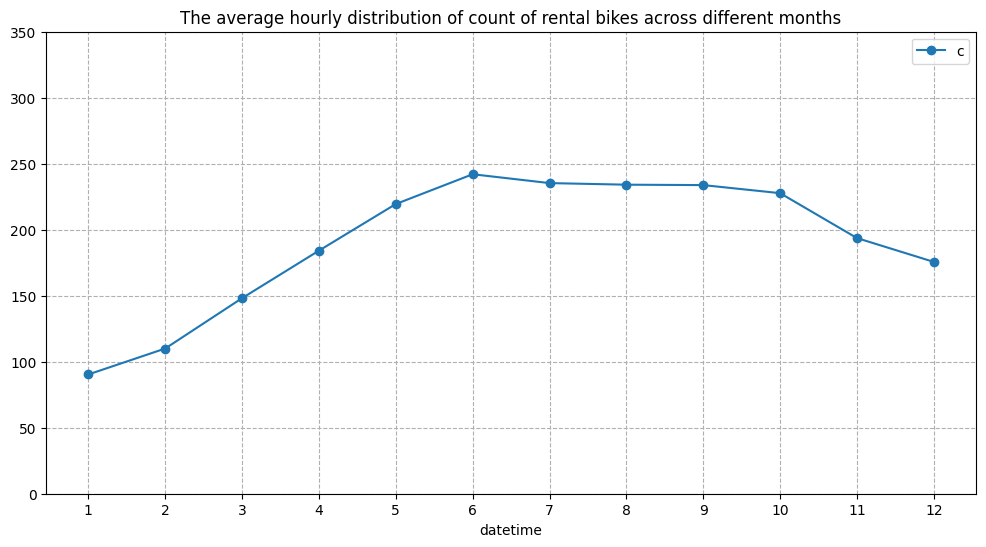

In [20]:
plt.figure(figsize = (12, 6))


plt.title("The average hourly distribution of count of rental bikes across different months")
yulu_df.groupby(by = yulu_df['datetime'].dt.month)['count'].mean().plot(kind = 'line', marker = 'o')
plt.ylim(0,)    
plt.xticks(np.arange(1, 13))  
plt.legend('count')   
plt.yticks(np.arange(0, 400, 50))
plt.grid(axis = 'both', linestyle = '--')
plt.plot()    

## Observations

 - The average hourly count of rental bikes is the highest in the month of June followed by July and August.
 - The average hourly count of rental bikes is the lowest in the month of January followed by February and March.
 
*Overall, these trends suggest a seasonal pattern in the count of rental bikes, with higher demand during the spring and summer months, a slight decline in the fall, and a further decrease in the winter months. It could be useful for the rental bike company to consider these patterns for resource allocation, marketing strategies, and operational planning throughout the year.*

In [21]:
df1 = yulu_df.groupby(by = yulu_df['datetime'].dt.hour)['count'].mean().reset_index()
df1.rename(columns = {'datetime' : 'hour'}, inplace = True)
df1['prev_count'] = df1['count'].shift(1) 
df1['growth_percent'] = (df1['count'] - df1['prev_count']) * 100 / df1['prev_count']
df1.set_index('hour', inplace = True)
df1

,count,prev_count,growth_percent
hour,,,
0,55.138462,NaN,NaN
1,33.859031,55.138462,-38.592718
2,22.899554,33.859031,-32.367959
3,11.757506,22.899554,-48.656179
4,6.407240,11.757506,-45.505110
5,19.767699,6.407240,208.521293
6,76.259341,19.767699,285.777526
7,213.116484,76.259341,179.462793
8,362.769231,213.116484,70.221104


 ## Observations
 
 - During the early morning hours (hours 0 to 5), there is a significant decrease in the count, with negative growth percentages ranging from -38.59% to -48.66%.
 - However, starting from hour 5, there is a sudden increase in count, with a sharp positive growth percentage of 208.52% observed from hour 4 to hour 5.
 - The count continues to rise significantly until reaching its peak at hour 17, with a growth percentage of 48.17% compared to the previous hour.
 - After hour 17, there is a gradual decrease in count, with negative growth percentages ranging from -8.08% to -32.99% during the late evening and nighttime hours.

[]

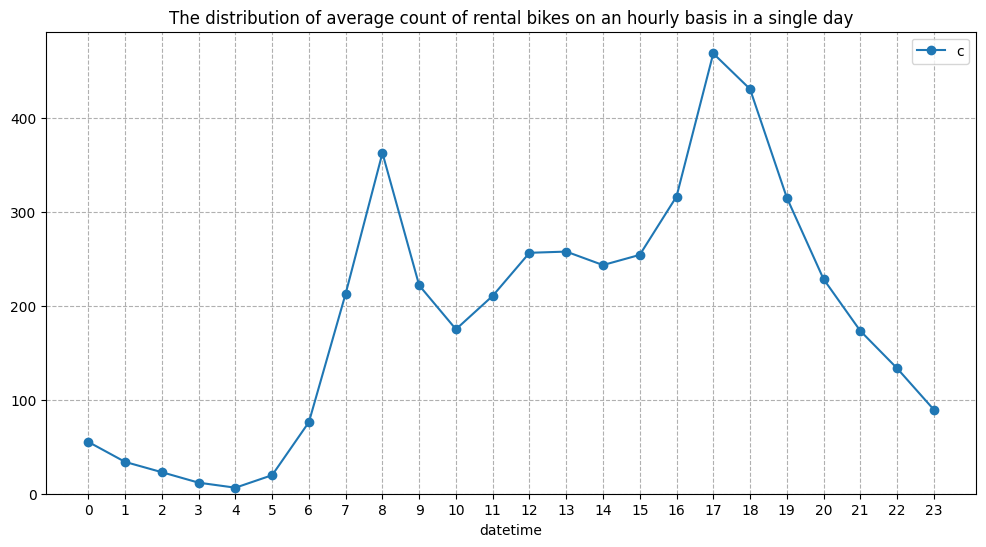

In [22]:
plt.figure(figsize = (12, 6))
plt.title("The distribution of average count of rental bikes on an hourly basis in a single day")
yulu_df.groupby(by = yulu_df['datetime'].dt.hour)['count'].mean().plot(kind = 'line', marker = 'o')
plt.ylim(0,)
plt.xticks(np.arange(0, 24))
plt.legend('count')
plt.grid(axis = 'both', linestyle = '--')
plt.plot()

## Observations 

 - The average count of rental bikes is the highest at 5 PM followed by 6 PM and 8 AM of the day.
 - The average count of rental bikes is the lowest at 4 AM followed by 3 AM and 5 AM of the day.
 
*These patterns indicate that there is a distinct fluctuation in count throughout the day, with low counts during early morning hours, a sudden increase in the morning, a peak count in the afternoon, and a gradual decline in the evening and nighttime.*

### some additional data related information

In [23]:
yulu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  day         10886 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(8), object(1)
memory usage: 1.1+ MB


In [24]:
# 1: spring, 2: summer, 3: fall, 4: winter
def season_category(x):
    if x == 1:
        return 'spring'
    elif x == 2:
        return 'summer'
    elif x == 3:
        return 'fall'
    else:
        return 'winter'
yulu_df['season'] = yulu_df['season'].apply(season_category)

In [25]:
yulu_df['season'] = yulu_df['season'].astype('category')
yulu_df['holiday'] = yulu_df['holiday'].astype('category')
yulu_df['workingday'] = yulu_df['workingday'].astype('category')
yulu_df['weather'] = yulu_df['weather'].astype('category')
yulu_df['temp'] = yulu_df['temp'].astype('float32')
yulu_df['atemp'] = yulu_df['atemp'].astype('float32')
yulu_df['humidity'] = yulu_df['humidity'].astype('int8')
yulu_df['windspeed'] = yulu_df['windspeed'].astype('float32')
yulu_df['casual'] = yulu_df['casual'].astype('int16')
yulu_df['registered'] = yulu_df['registered'].astype('int16')
yulu_df['count'] = yulu_df['count'].astype('int16')

In [26]:
yulu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  category      
 2   holiday     10886 non-null  category      
 3   workingday  10886 non-null  category      
 4   weather     10886 non-null  category      
 5   temp        10886 non-null  float32       
 6   atemp       10886 non-null  float32       
 7   humidity    10886 non-null  int8          
 8   windspeed   10886 non-null  float32       
 9   casual      10886 non-null  int16         
 10  registered  10886 non-null  int16         
 11  count       10886 non-null  int16         
 12  day         10886 non-null  object        
dtypes: category(4), datetime64[ns](1), float32(3), int16(3), int8(1), object(1)
memory usage: 415.4+ KB


#### Basic Data Description

In [27]:
yulu_df.describe()

,datetime,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011-12-27 05:56:22.399411968,20.230862,23.655085,61.886460,12.799396,36.021955,155.552177,191.574132
min,2011-01-01 00:00:00,0.820000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 07:15:00,13.940000,16.665001,47.000000,7.001500,4.000000,36.000000,42.000000
50%,2012-01-01 20:30:00,20.500000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,2012-07-01 12:45:00,26.240000,31.059999,77.000000,16.997900,49.000000,222.000000,284.000000
max,2012-12-19 23:00:00,41.000000,45.455002,100.000000,56.996899,367.000000,886.000000,977.000000
std,NaN,7.791590,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454


 - These statistics provide insights into the central tendency, spread, and range of the numerical features in the dataset.

In [28]:
np.round(yulu_df['season'].value_counts(normalize = True) * 100, 2)
np.round(yulu_df['holiday'].value_counts(normalize = True) * 100, 2)
np.round(yulu_df['workingday'].value_counts(normalize = True) * 100, 2)
np.round(yulu_df['weather'].value_counts(normalize = True) * 100, 2)

weather
1    66.07
2    26.03
3     7.89
4     0.01
Name: proportion, dtype: float64

In [29]:
yulu_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day
0,2011-01-01 00:00:00,spring,0,0,1,9.84,14.395,81,0.0,3,13,16,Saturday
1,2011-01-01 01:00:00,spring,0,0,1,9.02,13.635,80,0.0,8,32,40,Saturday
2,2011-01-01 02:00:00,spring,0,0,1,9.02,13.635,80,0.0,5,27,32,Saturday
3,2011-01-01 03:00:00,spring,0,0,1,9.84,14.395,75,0.0,3,10,13,Saturday
4,2011-01-01 04:00:00,spring,0,0,1,9.84,14.395,75,0.0,0,1,1,Saturday


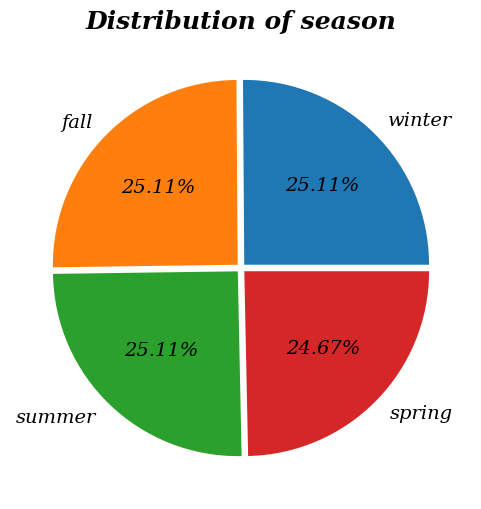

In [30]:
plt.figure(figsize=(6, 6))

# Setting the title of the plot
plt.title('Distribution of season', fontdict={'fontsize': 18,
                                              'fontweight': 600,
                                              'fontstyle': 'oblique',
                                              'fontfamily': 'serif'})

# Calculate the distribution of seasons
df_season = np.round(yulu_df['season'].value_counts(normalize=True) * 100, 2).to_frame()
df_season.columns = ['percentage']

# Creating the pie-chart
plt.pie(x=df_season['percentage'], 
        explode=[0.025, 0.025, 0.025, 0.025], 
        labels=df_season.index,
        autopct='%.2f%%', 
        textprops={'fontsize': 14,
                   'fontstyle': 'oblique',
                   'fontfamily': 'serif',
                   'fontweight': 500})

# Displaying the plot
plt.show()

[]

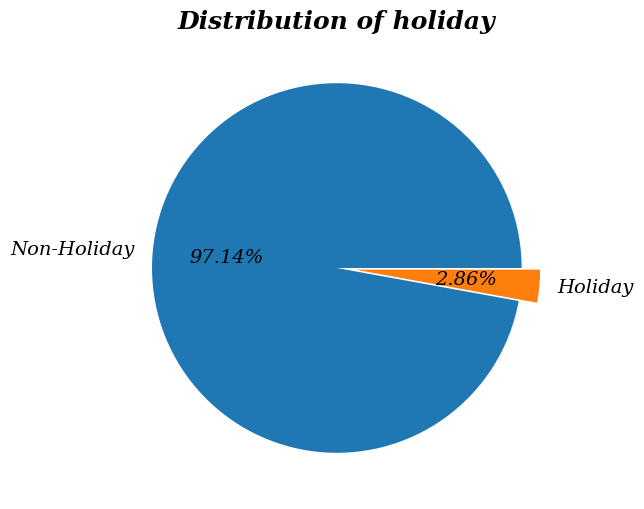

In [31]:
# The below code generates a visually appealing pie chart to showcase the 
    # distribution of holiday in the dataset

plt.figure(figsize = (6, 6))     # setting the figure size to 6*6

# setting the title of the plot
plt.title('Distribution of holiday', fontdict = {'fontsize' : 18,
                                                'fontweight' : 600,
                                                'fontstyle' : 'oblique',
                                                'fontfamily' : 'serif'})

df_holiday = np.round(yulu_df['holiday'].value_counts(normalize = True) * 100, 2).to_frame()
df_holiday.columns = ['holiday']
# Creating the pie-chart
plt.pie(x = df_holiday['holiday'], 
        explode = [0, 0.1], 
        labels = ['Non-Holiday', 'Holiday'], 
        autopct = '%.2f%%', 
        textprops = {'fontsize' : 14,
                   'fontstyle' : 'oblique',
                   'fontfamily' : 'serif',
                   'fontweight' : 500})

plt.plot()        # displaying the plot

[]

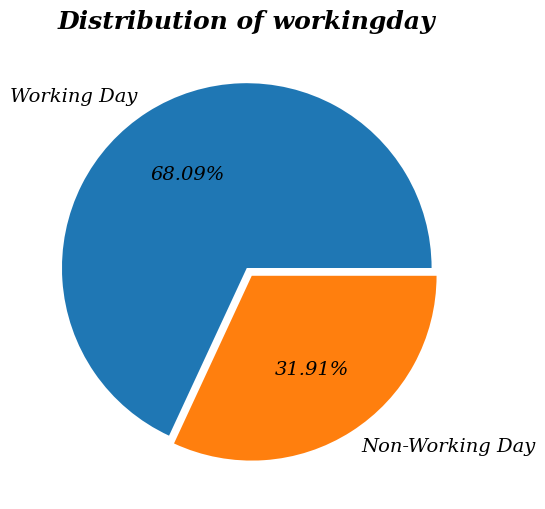

In [32]:
# The below code generates a visually appealing pie chart to showcase the 
    # distribution of workingday in the dataset

plt.figure(figsize = (6, 6))    # setting the figure size to 6*6

# setting the title of the plot
plt.title('Distribution of workingday', fontdict = {'fontsize' : 18,
                                                'fontweight' : 600,
                                                'fontstyle' : 'oblique',
                                                'fontfamily' : 'serif'})

df_workingday = np.round(yulu_df['workingday'].value_counts(normalize = True) * 100, 2).to_frame()
df_workingday.columns = ['workingday']
# Creating the pie-chart
plt.pie(x = df_workingday['workingday'], 
        explode = [0, 0.05], 
        labels = ['Working Day', 'Non-Working Day'], 
        autopct = '%.2f%%', 
        textprops = {'fontsize' : 14,
                   'fontstyle' : 'oblique',
                   'fontfamily' : 'serif',
                   'fontweight' : 500})

plt.plot()         # displaying the plot

[]

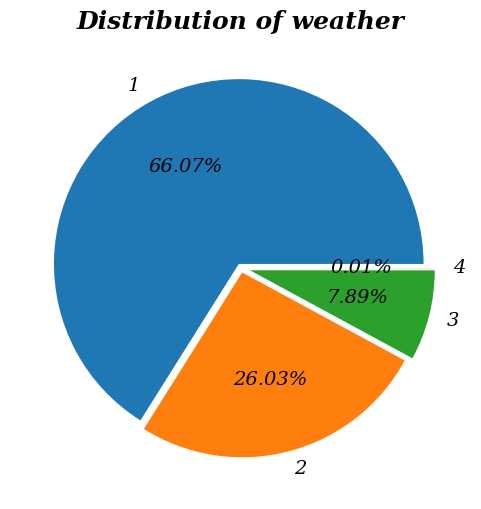

In [33]:
# The below code generates a visually appealing pie chart to showcase the 
    # distribution of weather in the dataset

plt.figure(figsize = (6, 6))     # setting the figure size to 6*6

# setting the title of the plot
plt.title('Distribution of weather', fontdict = {'fontsize' : 18,
                                                'fontweight' : 600,
                                                'fontstyle' : 'oblique',
                                                'fontfamily' : 'serif'})

df_weather = np.round(yulu_df['weather'].value_counts(normalize = True) * 100, 2).to_frame()
df_weather.columns = ['weather']
# Creating the pie-chart
plt.pie(x = df_weather['weather'], 
        explode = [0.025, 0.025, 0.05, 0.05], 
        labels = df_weather.index, 
        autopct = '%.2f%%', 
        textprops = {'fontsize' : 14,
                   'fontstyle' : 'oblique',
                   'fontfamily' : 'serif',
                   'fontweight' : 500})

plt.plot()        # displaying the plot

### Univariate Analysis

[]

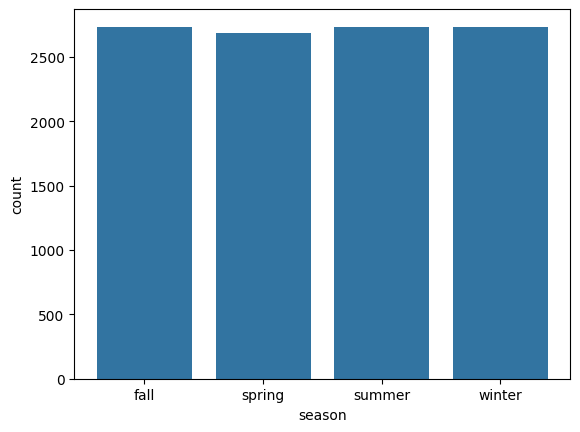

In [34]:
# The below code generates a visually appealing count plot to showcase the 
    # distribution of season in the dataset
sns.countplot(data = yulu_df, x = 'season')
plt.plot()   # displaying the plot

[]

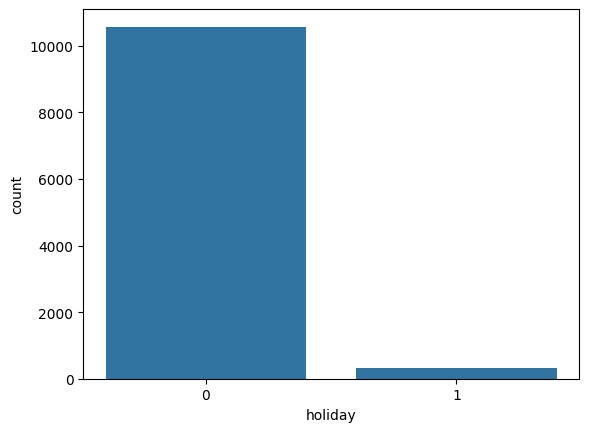

In [35]:
# The below code generates a visually appealing count plot to showcase the 
    # distribution of holiday in the dataset
    
sns.countplot(data = yulu_df, x = 'holiday')
plt.plot()       # displaying the chart

[]

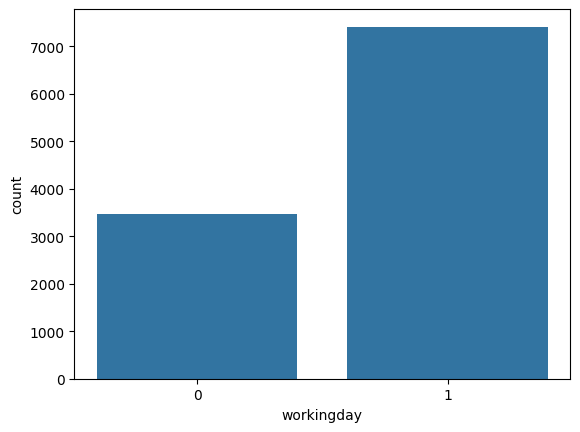

In [36]:
# The below code generates a visually appealing count plot to showcase the 
    # distribution of workingday in the dataset

sns.countplot(data = yulu_df, x = 'workingday')
plt.plot()      # displaying the chart

[]

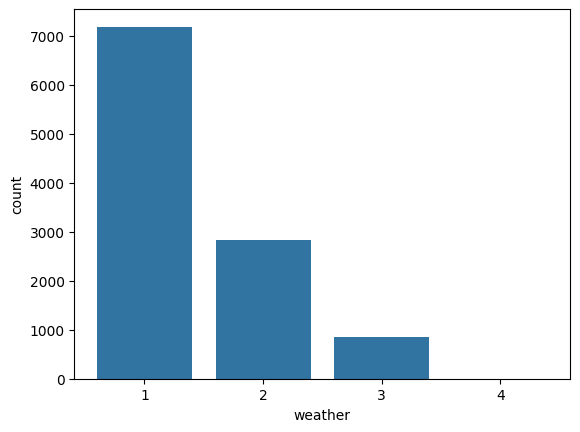

In [37]:
# The below code generates a visually appealing count plot to showcase the 
    # distribution of weather in the dataset

sns.countplot(data = yulu_df, x = 'weather')
plt.plot()        # displaying the chart

[]

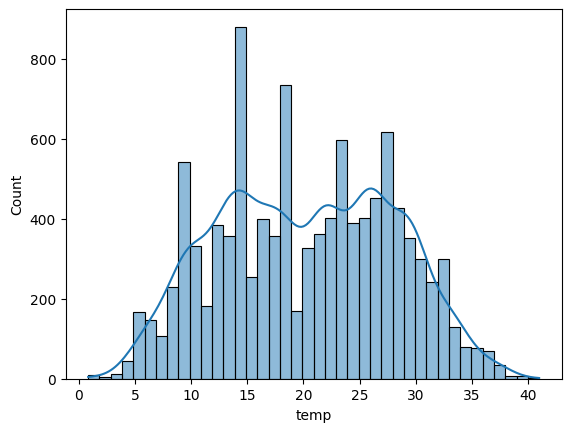

In [38]:
sns.histplot(data = yulu_df, x = 'temp', kde = True, bins = 40)
plt.plot()        

In [39]:
temp_mean = np.round(yulu_df['temp'].mean(), 2)
temp_std = np.round(yulu_df['temp'].std(), 2)
temp_mean, temp_std 

(20.23, 7.79)

## Observations 

 - The mean and the standard deviation of the temp column is 20.23 and 7.79 degree celcius respectively.

[]

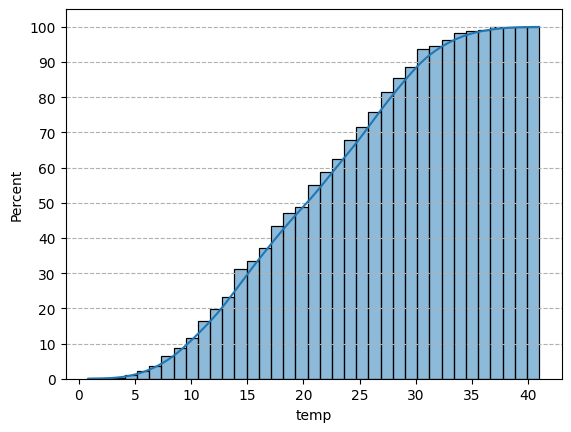

In [40]:
sns.histplot(data = yulu_df, x = 'temp', kde = True, cumulative = True, stat = 'percent')
plt.grid(axis = 'y', linestyle = '--')
plt.yticks(np.arange(0, 101, 10))
plt.plot()        

### Observations 

 - More than 80 % of the time, the temperature is less than 28 degrees celcius.

[]

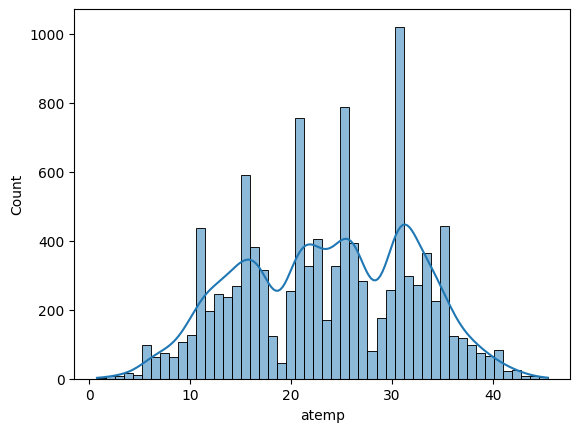

In [41]:
sns.histplot(data = yulu_df, x = 'atemp', kde = True, bins = 50)
plt.plot()         

In [42]:
temp_mean = np.round(yulu_df['atemp'].mean(), 2)
temp_std = np.round(yulu_df['atemp'].std(), 2)
temp_mean, temp_std 

(23.66, 8.47)

### Observations 

 - The mean and the standard deviation of the atemp column is 23.66 and 8.47 degree celcius respectively.

[]

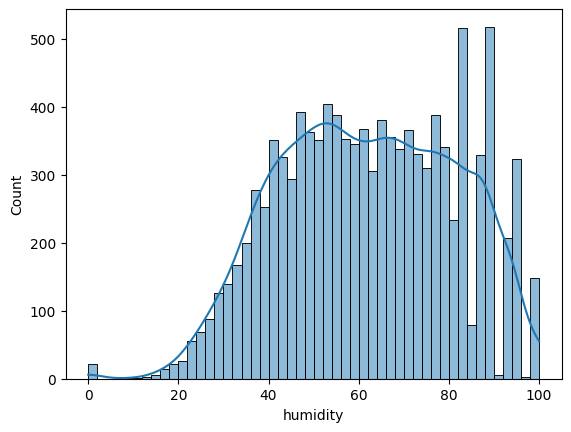

In [43]:
sns.histplot(data = yulu_df, x = 'humidity', kde = True, bins = 50)
plt.plot()       

In [44]:
humidity_mean = np.round(yulu_df['humidity'].mean(), 2)
humidity_std = np.round(yulu_df['humidity'].std(), 2)
humidity_mean, humidity_std 

(61.89, 19.25)

### Observations 
 - The mean and the standard deviation of the humidity column is 61.89 and 19.25 respectively.

[]

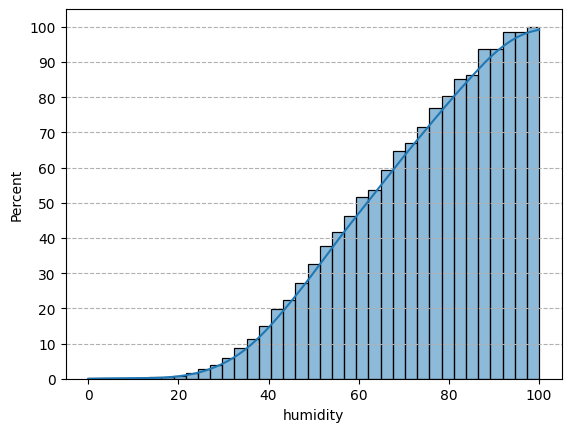

In [45]:
sns.histplot(data = yulu_df, x = 'humidity', kde = True, cumulative = True, stat = 'percent')
plt.grid(axis = 'y', linestyle = '--')    
plt.yticks(np.arange(0, 101, 10))
plt.plot()

### Observations 
 - More than 80 % of the time, the humidity value is greater than 40. Thus for most of the time, humidity level varies from optimum to too moist. 

[]

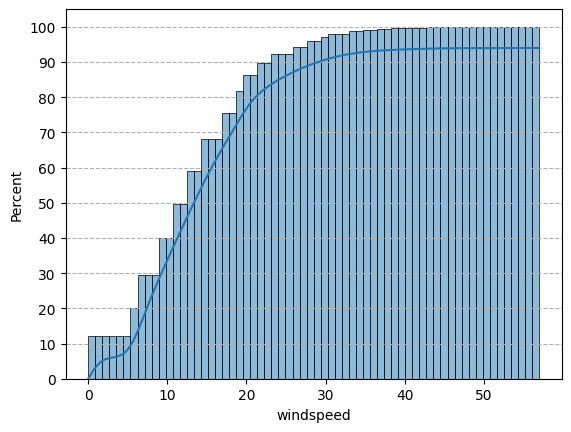

In [46]:
sns.histplot(data = yulu_df, x = 'windspeed', kde = True, cumulative = True, stat = 'percent')
plt.grid(axis = 'y', linestyle = '--')
plt.yticks(np.arange(0, 101, 10))
plt.plot() 

### Observations 

 - More than 85 % of the total windspeed data has a value of less than 20.

In [47]:
len(yulu_df[yulu_df['windspeed'] < 20]) / len(yulu_df)

0.8626676465184641

[]

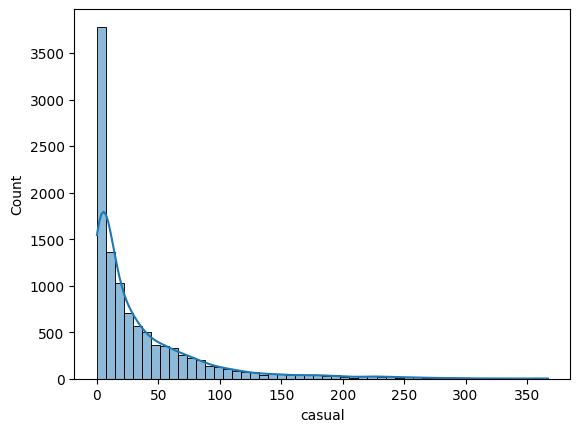

In [48]:
sns.histplot(data = yulu_df, x = 'casual', kde = True, bins = 50)
plt.plot()

[]

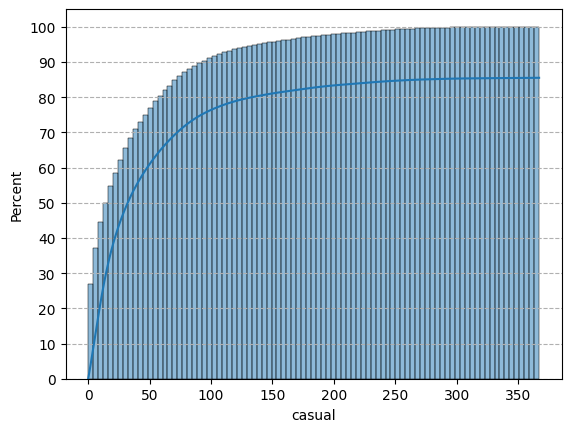

In [49]:
sns.histplot(data = yulu_df, x = 'casual', kde = True, cumulative = True, stat = 'percent')
plt.grid(axis = 'y', linestyle = '--')
plt.yticks(np.arange(0, 101, 10))
plt.plot()  

[]

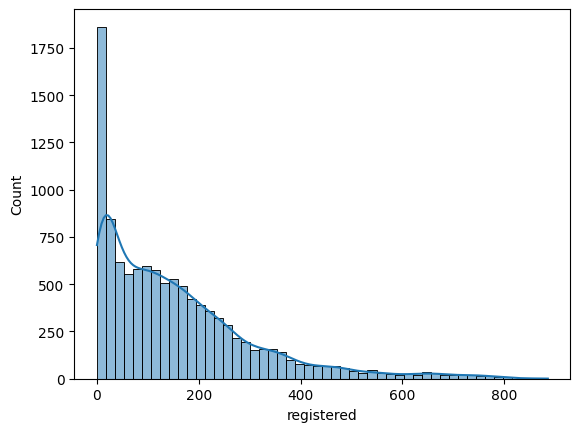

In [50]:
sns.histplot(data = yulu_df, x = 'registered', kde = True, bins = 50)
plt.plot() 

[]

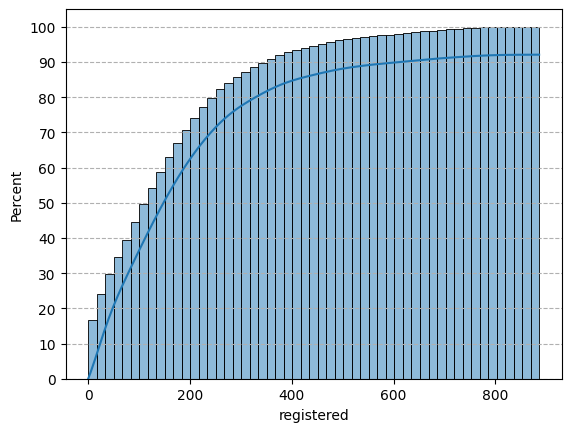

In [51]:
sns.histplot(data = yulu_df, x = 'registered', kde = True, cumulative = True, stat = 'percent')
plt.grid(axis = 'y', linestyle = '--')
plt.yticks(np.arange(0, 101, 10))
plt.plot() 

### Observations 

 - More than 85 % of the time, the count of registered users is less than 300.

### Outliers Detection

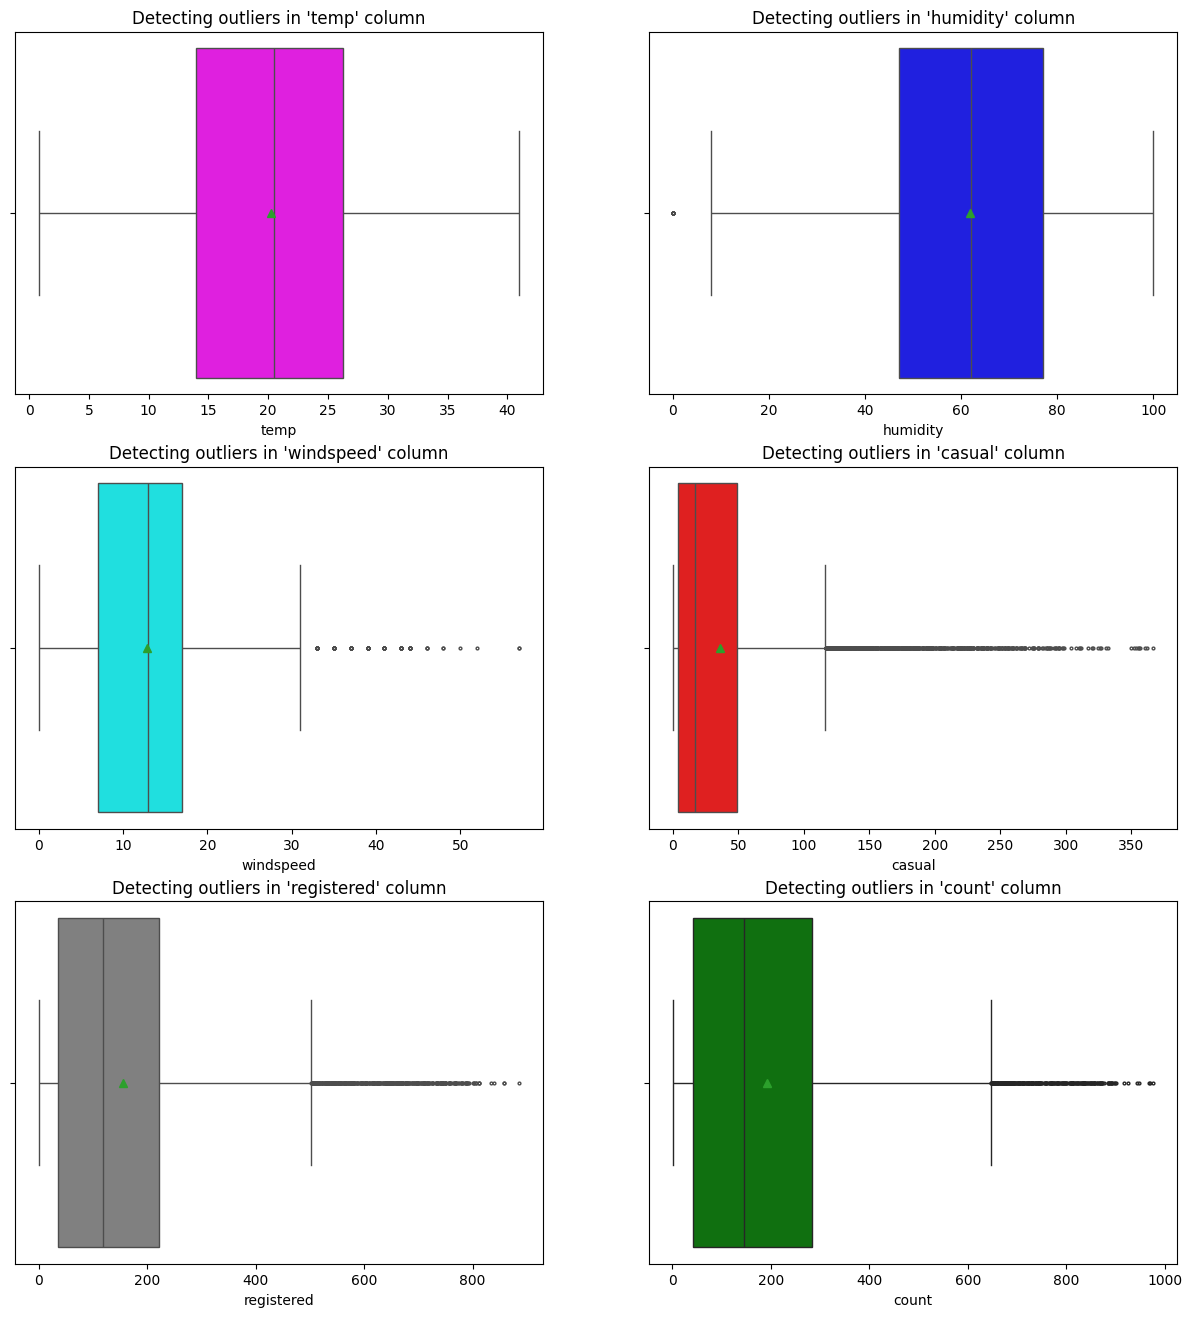

In [52]:
columns = ['temp', 'humidity', 'windspeed', 'casual', 'registered', 'count']
colors = np.random.permutation(['red', 'blue', 'green', 'magenta', 'cyan', 'gray'])
count = 1
plt.figure(figsize = (15, 16))
for i in columns:
    plt.subplot(3, 2, count)
    plt.title(f"Detecting outliers in '{i}' column")
    sns.boxplot(data = yulu_df, x = yulu_df[i], color = colors[count - 1], showmeans = True, fliersize = 2)
    plt.plot()
    count += 1

### Observations 

 - There is no outlier in the temp column.
 - There are few outliers present in humidity column.
 - There are many outliers present in each of the columns : windspeed, casual, registered, count.

## Bivariate Analysis

[]

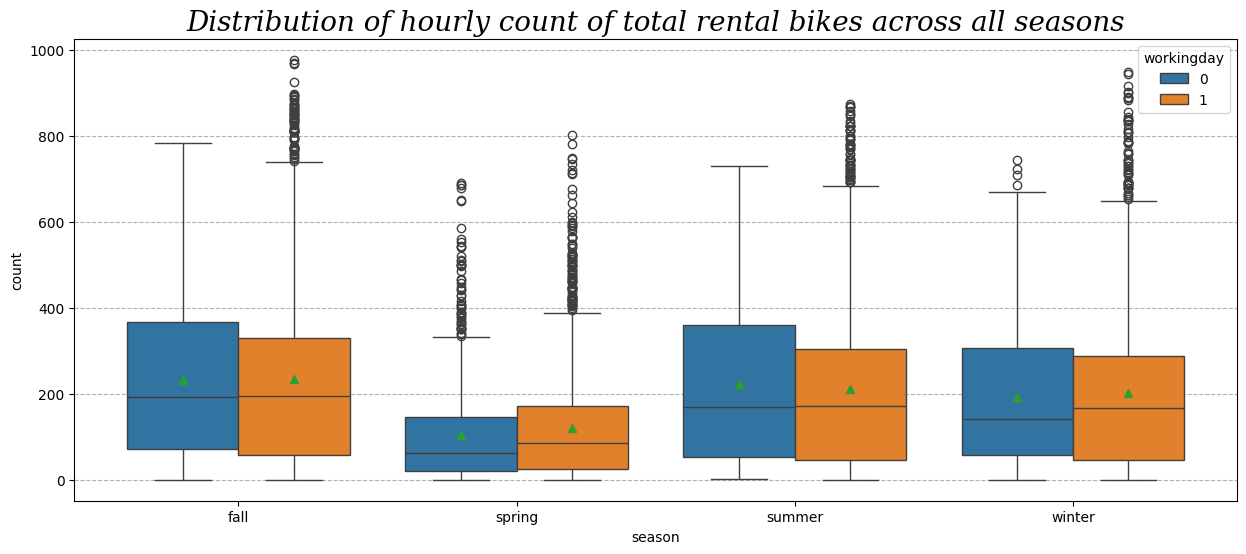

In [53]:
plt.figure(figsize = (15, 6))
plt.title('Distribution of hourly count of total rental bikes across all seasons',
         fontdict = {'size' : 20,
                    'style' : 'oblique',
                    'family' : 'serif'})
sns.boxplot(data = yulu_df, x = 'season', y = 'count', hue = 'workingday', showmeans = True)
plt.grid(axis = 'y', linestyle = '--')
plt.plot()

### Observations 

 - The hourly count of total rental bikes is higher in the fall season, followed by the summer and winter seasons. It is generally low in the spring season.

[]

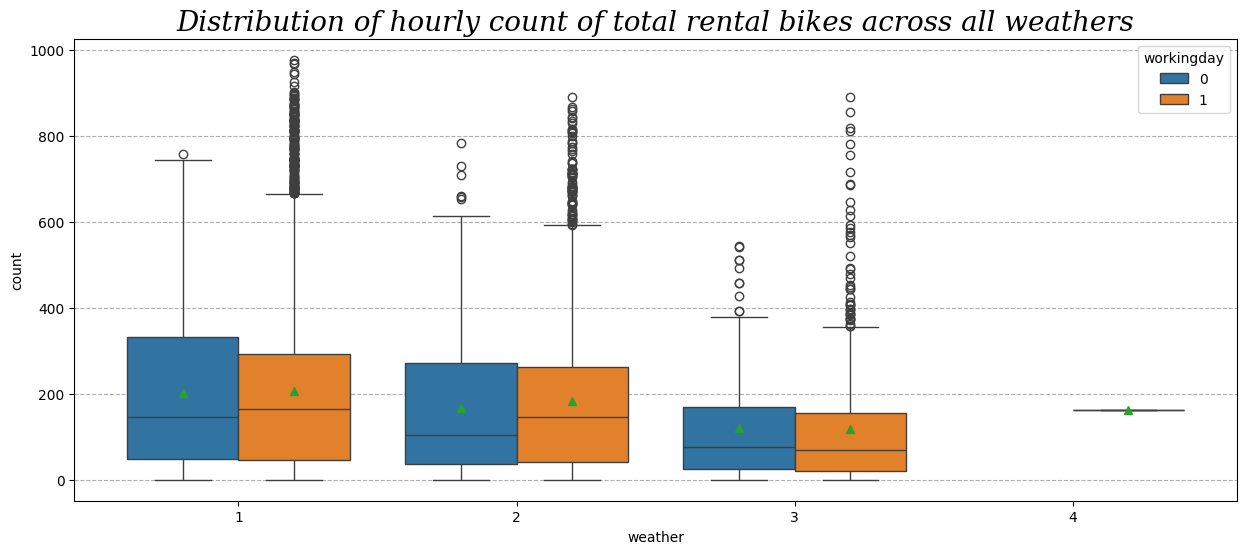

In [54]:
plt.figure(figsize = (15, 6))
plt.title('Distribution of hourly count of total rental bikes across all weathers',
         fontdict = {'size' : 20,
                    'style' : 'oblique',
                    'family' : 'serif'})
sns.boxplot(data = yulu_df, x = 'weather', y = 'count', hue = 'workingday', showmeans = True)
plt.grid(axis = 'y', linestyle = '--')
plt.plot()

### Observations 

 - The hourly count of total rental bikes is higher in the clear and cloudy weather, followed by the misty weather and rainy weather. There are very few records for extreme weather conditions. 

 - Identify the link between working day and number of electric cycles rented?

In [55]:
yulu_df.groupby(by = 'workingday')['count'].describe()

C:\Users\tripa\AppData\Local\Temp\ipykernel_9340\2333756059.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  yulu_df.groupby(by = 'workingday')['count'].describe()


,count,mean,std,min,25%,50%,75%,max
workingday,,,,,,,,
0,3474.0,188.506621,173.724015,1.0,44.0,128.0,304.0,783.0
1,7412.0,193.011873,184.513659,1.0,41.0,151.0,277.0,977.0


[]

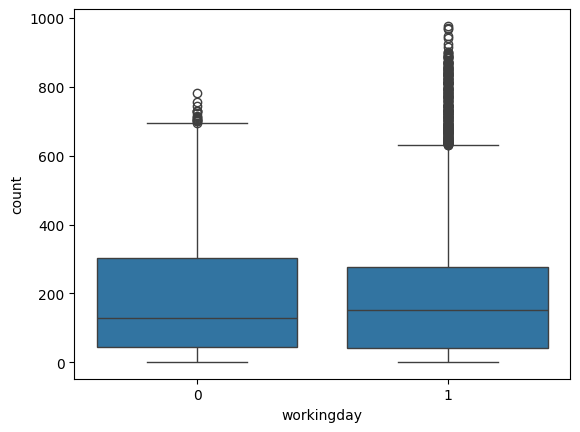

In [56]:
sns.boxplot(data = yulu_df, x = 'workingday', y = 'count')
plt.plot()

***STEP-1*** : Set up Null Hypothesis

---



  * **Null Hypothesis ( H0 )** - Working Day does not have any effect on the number of electric cycles rented. 

  * **Alternate Hypothesis ( HA )** - Working Day has some effect on the number of electric cycles rented

***STEP-2*** : Checking for basic assumpitons for the hypothesis

---
* Distribution check using **QQ Plot**
* Homogeneity of Variances using **Levene's test**

***STEP-3***: Define Test statistics; Distribution of T under H0.

---
* If the assumptions of T Test are met then we can proceed performing T Test for independent samples else we will perform the non parametric test equivalent to T Test for independent sample i.e., Mann-Whitney U rank test for two independent samples.


***STEP-4***: Compute the p-value and fix value of alpha.

---
* We set our ***alpha to be 0.05***

***STEP-5***: Compare p-value and alpha.

---

* Based on p-value, we will accept or reject H0.


  1.   **p-val > alpha** : Accept H0
  2.   **p-val < alpha** : Reject H0

***Visual Tests to know if the samples follow normal distribution***

[]

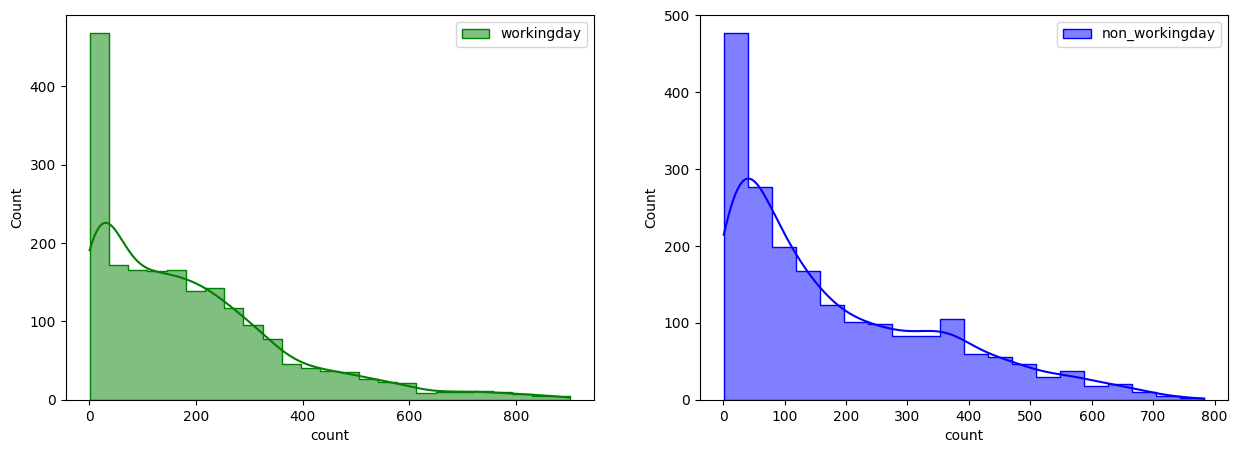

In [57]:
plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)
sns.histplot(yulu_df.loc[yulu_df['workingday'] == 1, 'count'].sample(2000), 
             element = 'step', color = 'green', kde = True, label = 'workingday')
plt.legend()
plt.subplot(1, 2, 2)
sns.histplot(yulu_df.loc[yulu_df['workingday'] == 0, 'count'].sample(2000), 
             element = 'step', color = 'blue', kde = True, label = 'non_workingday')
plt.legend()
plt.plot()

### Observations 

 - It can be inferred from the above plot that the distributions do not follow normal distribution.

***Distribution check using QQ Plot***

[]

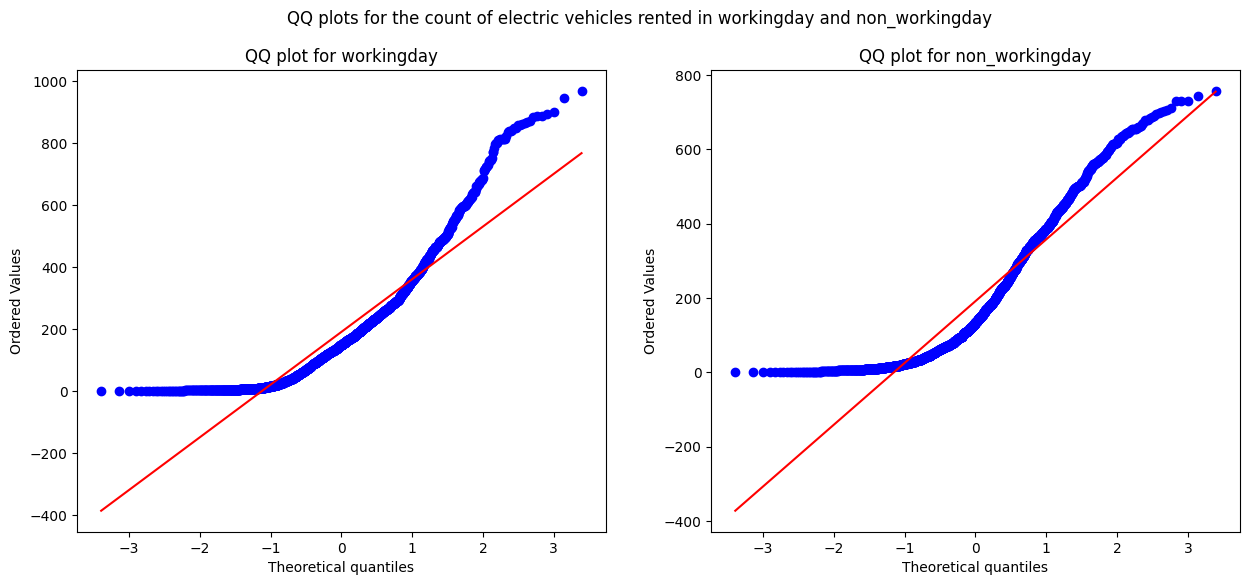

In [58]:
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
plt.suptitle('QQ plots for the count of electric vehicles rented in workingday and non_workingday')
spy.probplot(yulu_df.loc[yulu_df['workingday'] == 1, 'count'].sample(2000), plot = plt, dist = 'norm')
plt.title('QQ plot for workingday')
plt.subplot(1, 2, 2)
spy.probplot(yulu_df.loc[yulu_df['workingday'] == 0, 'count'].sample(2000), plot = plt, dist = 'norm')
plt.title('QQ plot for non_workingday')
plt.plot()

### Observations 

 - It can be inferred from the above plot that the distributions do not follow normal distribution.


 - Applying Shapiro-Wilk test for normality


$H_0$ : The sample **follows normal distribution**
$H_1$ : The sample **does not follow normal distribution**

alpha = 0.05

Test Statistics : **Shapiro-Wilk test for normality**

In [59]:
test_stat, p_value = spy.shapiro(yulu_df.loc[yulu_df['workingday'] == 1, 'count'].sample(2000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')    

p-value 6.245025677924095e-37
The sample does not follow normal distribution


In [60]:
test_stat, p_value = spy.shapiro(yulu_df.loc[yulu_df['workingday'] == 0, 'count'].sample(2000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')  

p-value 1.552921016408709e-36
The sample does not follow normal distribution


***Transforming the data using boxcox transformation and checking if the transformed data follows normal distribution***

In [61]:
transformed_workingday = spy.boxcox(yulu_df.loc[yulu_df['workingday'] == 1, 'count'])[0]
test_stat, p_value = spy.shapiro(transformed_workingday)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution') 

p-value 1.6012507970038924e-33
The sample does not follow normal distribution


c:\Users\tripa\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7412.
  res = hypotest_fun_out(*samples, **kwds)


In [62]:
transformed_non_workingday = spy.boxcox(yulu_df.loc[yulu_df['workingday'] == 1, 'count'])[0]
test_stat, p_value = spy.shapiro(transformed_non_workingday)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 1.6012507970038924e-33
The sample does not follow normal distribution


 - Even after applying the boxcox transformation on each of the "workingday" and "non_workingday" data, the samples do not follow normal distribution.

* Homogeneity of Variances using **Lavene's test**

In [63]:
# Null Hypothesis(H0) - Homogenous Variance 

# Alternate Hypothesis(HA) - Non Homogenous Variance 

test_stat, p_value = spy.levene(yulu_df.loc[yulu_df['workingday'] == 1, 'count'].sample(2000),
                                yulu_df.loc[yulu_df['workingday'] == 0, 'count'].sample(2000))
print('p-value', p_value)
if p_value < 0.05:
    print('The samples do not have  Homogenous Variance')
else:
    print('The samples have Homogenous Variance ') 

p-value 0.7704505238073903
The samples have Homogenous Variance 


#### Since the samples are not normally distributed, T-Test cannot be applied here, we can perform its non parametric equivalent test i.e., Mann-Whitney U rank test for two independent samples.

In [64]:
test_stat, p_value = spy.mannwhitneyu(yulu_df.loc[yulu_df['workingday'] == 1, 'count'], 
                                      yulu_df.loc[yulu_df['workingday'] == 0, 'count'])
print('P-value :',p_value)
if p_value < 0.05:
    print('Mean no.of electric cycles rented is not same for working and non-working days')
else:
    print('Mean no.of electric cycles rented is same for working and non-working days')

P-value : 0.9679139953914079
Mean no.of electric cycles rented is same for working and non-working days


### Observations 

- Therefore, the mean hourly count of the total rental bikes is statistically same for both working and non- working days .

***Checking if holidays have any effect on number of cycles rented for that day***

In [65]:
yulu_df.groupby(by = 'holiday')['count'].describe()

C:\Users\tripa\AppData\Local\Temp\ipykernel_9340\1236146323.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  yulu_df.groupby(by = 'holiday')['count'].describe()


,count,mean,std,min,25%,50%,75%,max
holiday,,,,,,,,
0,10575.0,191.741655,181.513131,1.0,43.0,145.0,283.0,977.0
1,311.0,185.877814,168.300531,1.0,38.5,133.0,308.0,712.0


[]

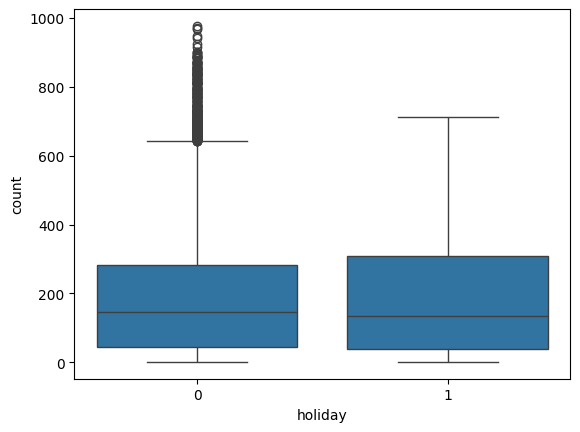

In [72]:
sns.boxplot(data = yulu_df, x = 'holiday', y='count')
plt.plot()

***Visual Tests to know if the samples follow normal distribution before we implement any hypothesis testing***

[]

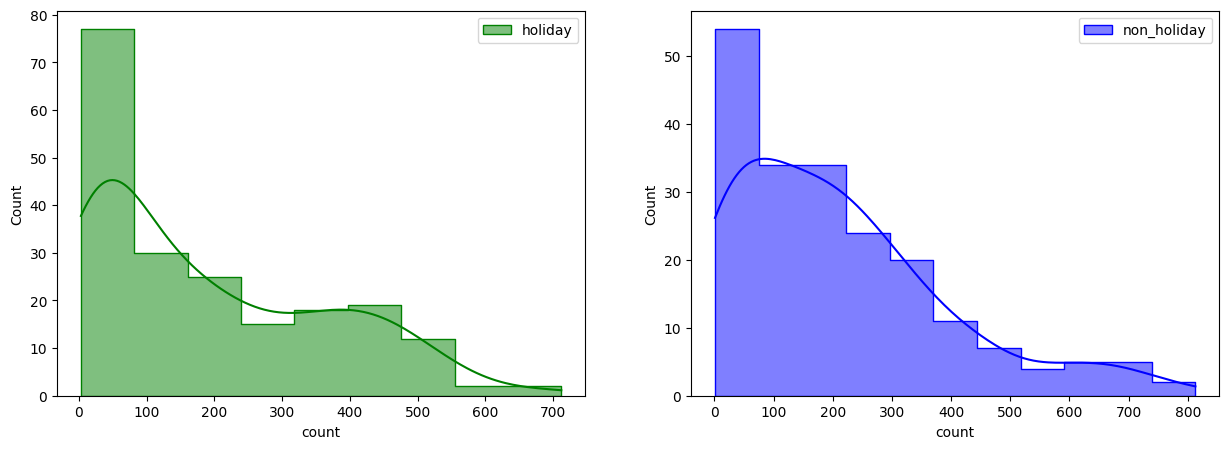

In [78]:
plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)
sns.histplot(yulu_df.loc[yulu_df['holiday'] == 1, 'count'].sample(200), 
             element = 'step', color = 'green', kde = True, label = 'holiday')
plt.legend()
plt.subplot(1, 2, 2)
sns.histplot(yulu_df.loc[yulu_df['holiday'] == 0, 'count'].sample(200), 
             element = 'step', color = 'blue', kde = True, label = 'non_holiday')
plt.legend()
plt.plot()

 ### Observations
 
 - It can be inferred from the above plot that the distributions do not follow normal distribution.

***Distribution check using QQ Plot***

[]

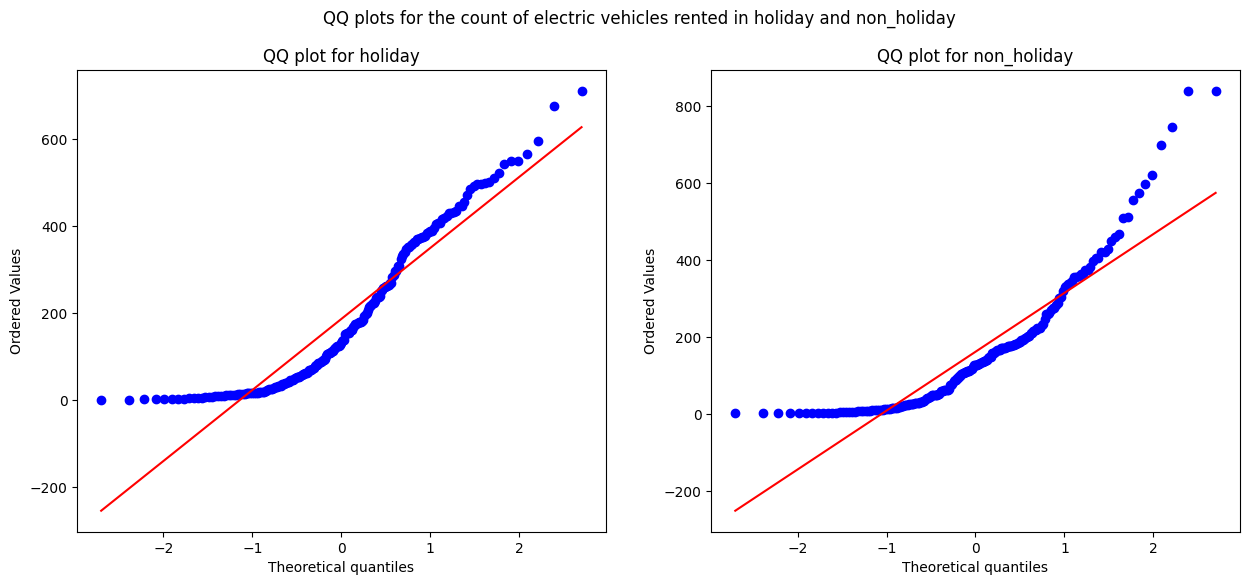

In [79]:
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
plt.suptitle('QQ plots for the count of electric vehicles rented in holiday and non_holiday')
spy.probplot(yulu_df.loc[yulu_df['holiday'] == 1, 'count'].sample(200), plot = plt, dist = 'norm')
plt.title('QQ plot for holiday')
plt.subplot(1, 2, 2)
spy.probplot(yulu_df.loc[yulu_df['holiday'] == 0, 'count'].sample(200), plot = plt, dist = 'norm')
plt.title('QQ plot for non_holiday')
plt.plot()

 ### Observations
 
 - It can be inferred from the above plot that the distributions do not follow normal distribution.


$H_0$ : The sample **follows normal distribution**
$H_1$ : The sample **does not follow normal distribution**

alpha = 0.05

Test Statistics : **Shapiro-Wilk test for normality**

In [80]:
test_stat, p_value = spy.shapiro(yulu_df.loc[yulu_df['holiday'] == 1, 'count'].sample(200))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')  

p-value 1.5456748990955121e-10
The sample does not follow normal distribution


In [82]:
test_stat, p_value = spy.shapiro(yulu_df.loc[yulu_df['holiday'] == 0, 'count'].sample(200))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')  

p-value 5.449132884187116e-11
The sample does not follow normal distribution


***Transforming the data using boxcox transformation and checking if the transformed data follows normal distribution.***

In [84]:
transformed_holiday = spy.boxcox(yulu_df.loc[yulu_df['holiday'] == 1, 'count'])[0]
test_stat, p_value = spy.shapiro(transformed_holiday)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution') 

transformed_non_holiday = spy.boxcox(yulu_df.loc[yulu_df['holiday'] == 0, 'count'].sample(5000))[0]
test_stat, p_value = spy.shapiro(transformed_non_holiday)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 2.1320821976904206e-07
The sample does not follow normal distribution
p-value 5.292624460577679e-26
The sample does not follow normal distribution


 - Even after applying the boxcox transformation on each of the "holiday" and "non_holiday" data, the samples do not follow normal distribution.

##### Since the samples are not normally distributed, T-Test cannot be applied here, we can perform its non parametric equivalent test i.e., Mann-Whitney U rank test for two independent samples.

In [86]:
# Ho : No.of electric cycles rented is similar for holidays and non-holidays
# Ha : No.of electric cycles rented is not similar for holidays and non-holidays days
# Assuming significance Level to be 0.05
# Test statistics : Mann-Whitney U rank test for two independent samples

test_stat, p_value = spy.mannwhitneyu(yulu_df.loc[yulu_df['holiday'] == 0, 'count'].sample(200),
                                      yulu_df.loc[yulu_df['holiday'] == 1, 'count'].sample(200))
print('P-value :',p_value)
if p_value < 0.05:
    print('No.of electric cycles rented is not similar for holidays and non-holidays days')
else:
    print('No.of electric cycles rented is similar for holidays and non-holidays')

P-value : 0.9696411948754153
No.of electric cycles rented is similar for holidays and non-holidays


##### Therefore, the number of electric cycles rented is statistically similar for both holidays and non - holidays. 

### Is weather  dependent on the season ?

In [87]:
yulu_df[['weather', 'season']].describe()

,weather,season
count,10886,10886
unique,4,4
top,1,winter
freq,7192,2734


The **Chi-square statistic is a non-parametric** (distribution free) tool designed to analyze group differences when the dependent variable is measured at a nominal level. Like all non-parametric statistics, the Chi-square is robust with respect to the distribution of the data. Specifically, it does not require equality of variances among the study groups or homoscedasticity in the data.

In [88]:
# First, finding the contingency table such that each value is the total number of total bikes rented 
  # for a particular season and weather 
cross_table = pd.crosstab(index = yulu_df['season'], 
                          columns = yulu_df['weather'], 
                          values = yulu_df['count'], 
                          aggfunc = np.sum).replace(np.nan, 0)
cross_table

C:\Users\tripa\AppData\Local\Temp\ipykernel_9340\2839469737.py:3: FutureWarning: The provided callable <function sum at 0x0000020A503896C0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  cross_table = pd.crosstab(index = yulu_df['season'],


weather,1,2,3,4
season,,,,
fall,470116,139386,31160,0
spring,223009,76406,12919,164
summer,426350,134177,27755,0
winter,356588,157191,30255,0


Since the above contingency table has one column in which the count of the rented electric vehicle is less than 5 in most of the cells, we can remove the weather 4 and then proceed further.

In [89]:
cross_table = pd.crosstab(index = yulu_df['season'], 
                          columns = yulu_df.loc[yulu_df['weather'] != 4, 'weather'], 
                          values = yulu_df['count'], 
                          aggfunc = np.sum).to_numpy()[:, :3]
cross_table

C:\Users\tripa\AppData\Local\Temp\ipykernel_9340\417015008.py:1: FutureWarning: The provided callable <function sum at 0x0000020A503896C0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  cross_table = pd.crosstab(index = yulu_df['season'],


array([[470116, 139386,  31160],
       [223009,  76406,  12919],
       [426350, 134177,  27755],
       [356588, 157191,  30255]], dtype=int64)

In [90]:
chi_test_stat, p_value, dof, expected = spy.chi2_contingency(observed = cross_table)
print('Test Statistic =', chi_test_stat)
print('p value =', p_value)
print('-' * 65)
print("Expected : '\n'", expected)

Test Statistic = 10838.372332480214
p value = 0.0
-----------------------------------------------------------------
Expected : '
' [[453484.88557396 155812.72247031  31364.39195574]
 [221081.86259035  75961.44434981  15290.69305984]
 [416408.3330293  143073.60199337  28800.06497733]
 [385087.91880639 132312.23118651  26633.8500071 ]]


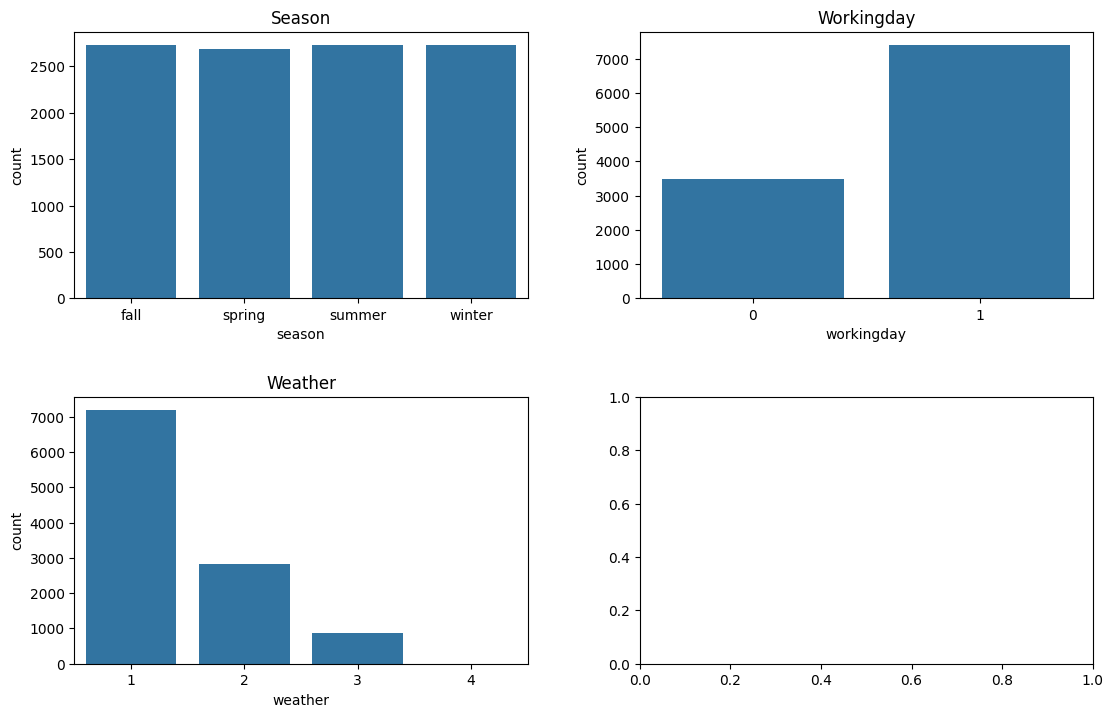

In [66]:
columns = ['season','workingday','weather']
fig, ax = plt.subplots(2,2,figsize=(12,8))
fig.tight_layout(pad=5.0)
i = 0;j= 0
for column in columns:
    plot_df = sns.countplot(data=yulu_df,x=column,ax=ax[i,j])
    plot_df.set_title(str.capitalize(column))
    j=j+1
    if j%2==0:i=i+1;j=0

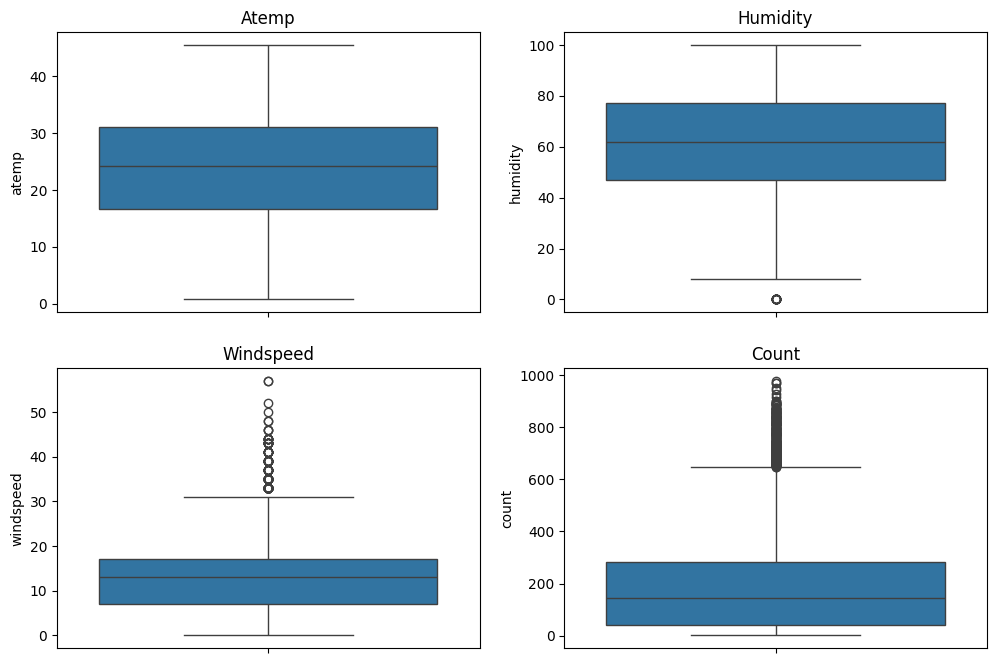

In [67]:
columns = ['atemp','humidity','windspeed','count']
fig, ax = plt.subplots(2,2,figsize=(12,8))
i = 0;j= 0
for column in columns:
    plot_df = sns.boxplot(data=yulu_df,y=column,ax=ax[i,j])
    plot_df.set_title(str.capitalize(column))
    j=j+1
    if j%2==0:i=i+1;j=0

Here, season colum is uniformly distributed. We got twice the workingday than holiday/weekend. Weather is mostly clear, sometimes we get mist or snowfall. But rarely a bad weather. Which is expected as people don't get out on bike on bad weather.<br>
atemp, humidity has normal distribution. But windspeed and count seems to be right skewed with too many outliers. Let's drop the outliers rows.

In [68]:
Q1 = yulu_df['count'].quantile(0.25)
Q3 = yulu_df['count'].quantile(0.75)
IQR = Q3 - Q1
df=yulu_df[(yulu_df['count']>Q1 - (1.5*IQR)) & (yulu_df['count']<Q3 + (1.5*IQR))].copy()
df.shape

(10583, 13)

## Correlation

[]

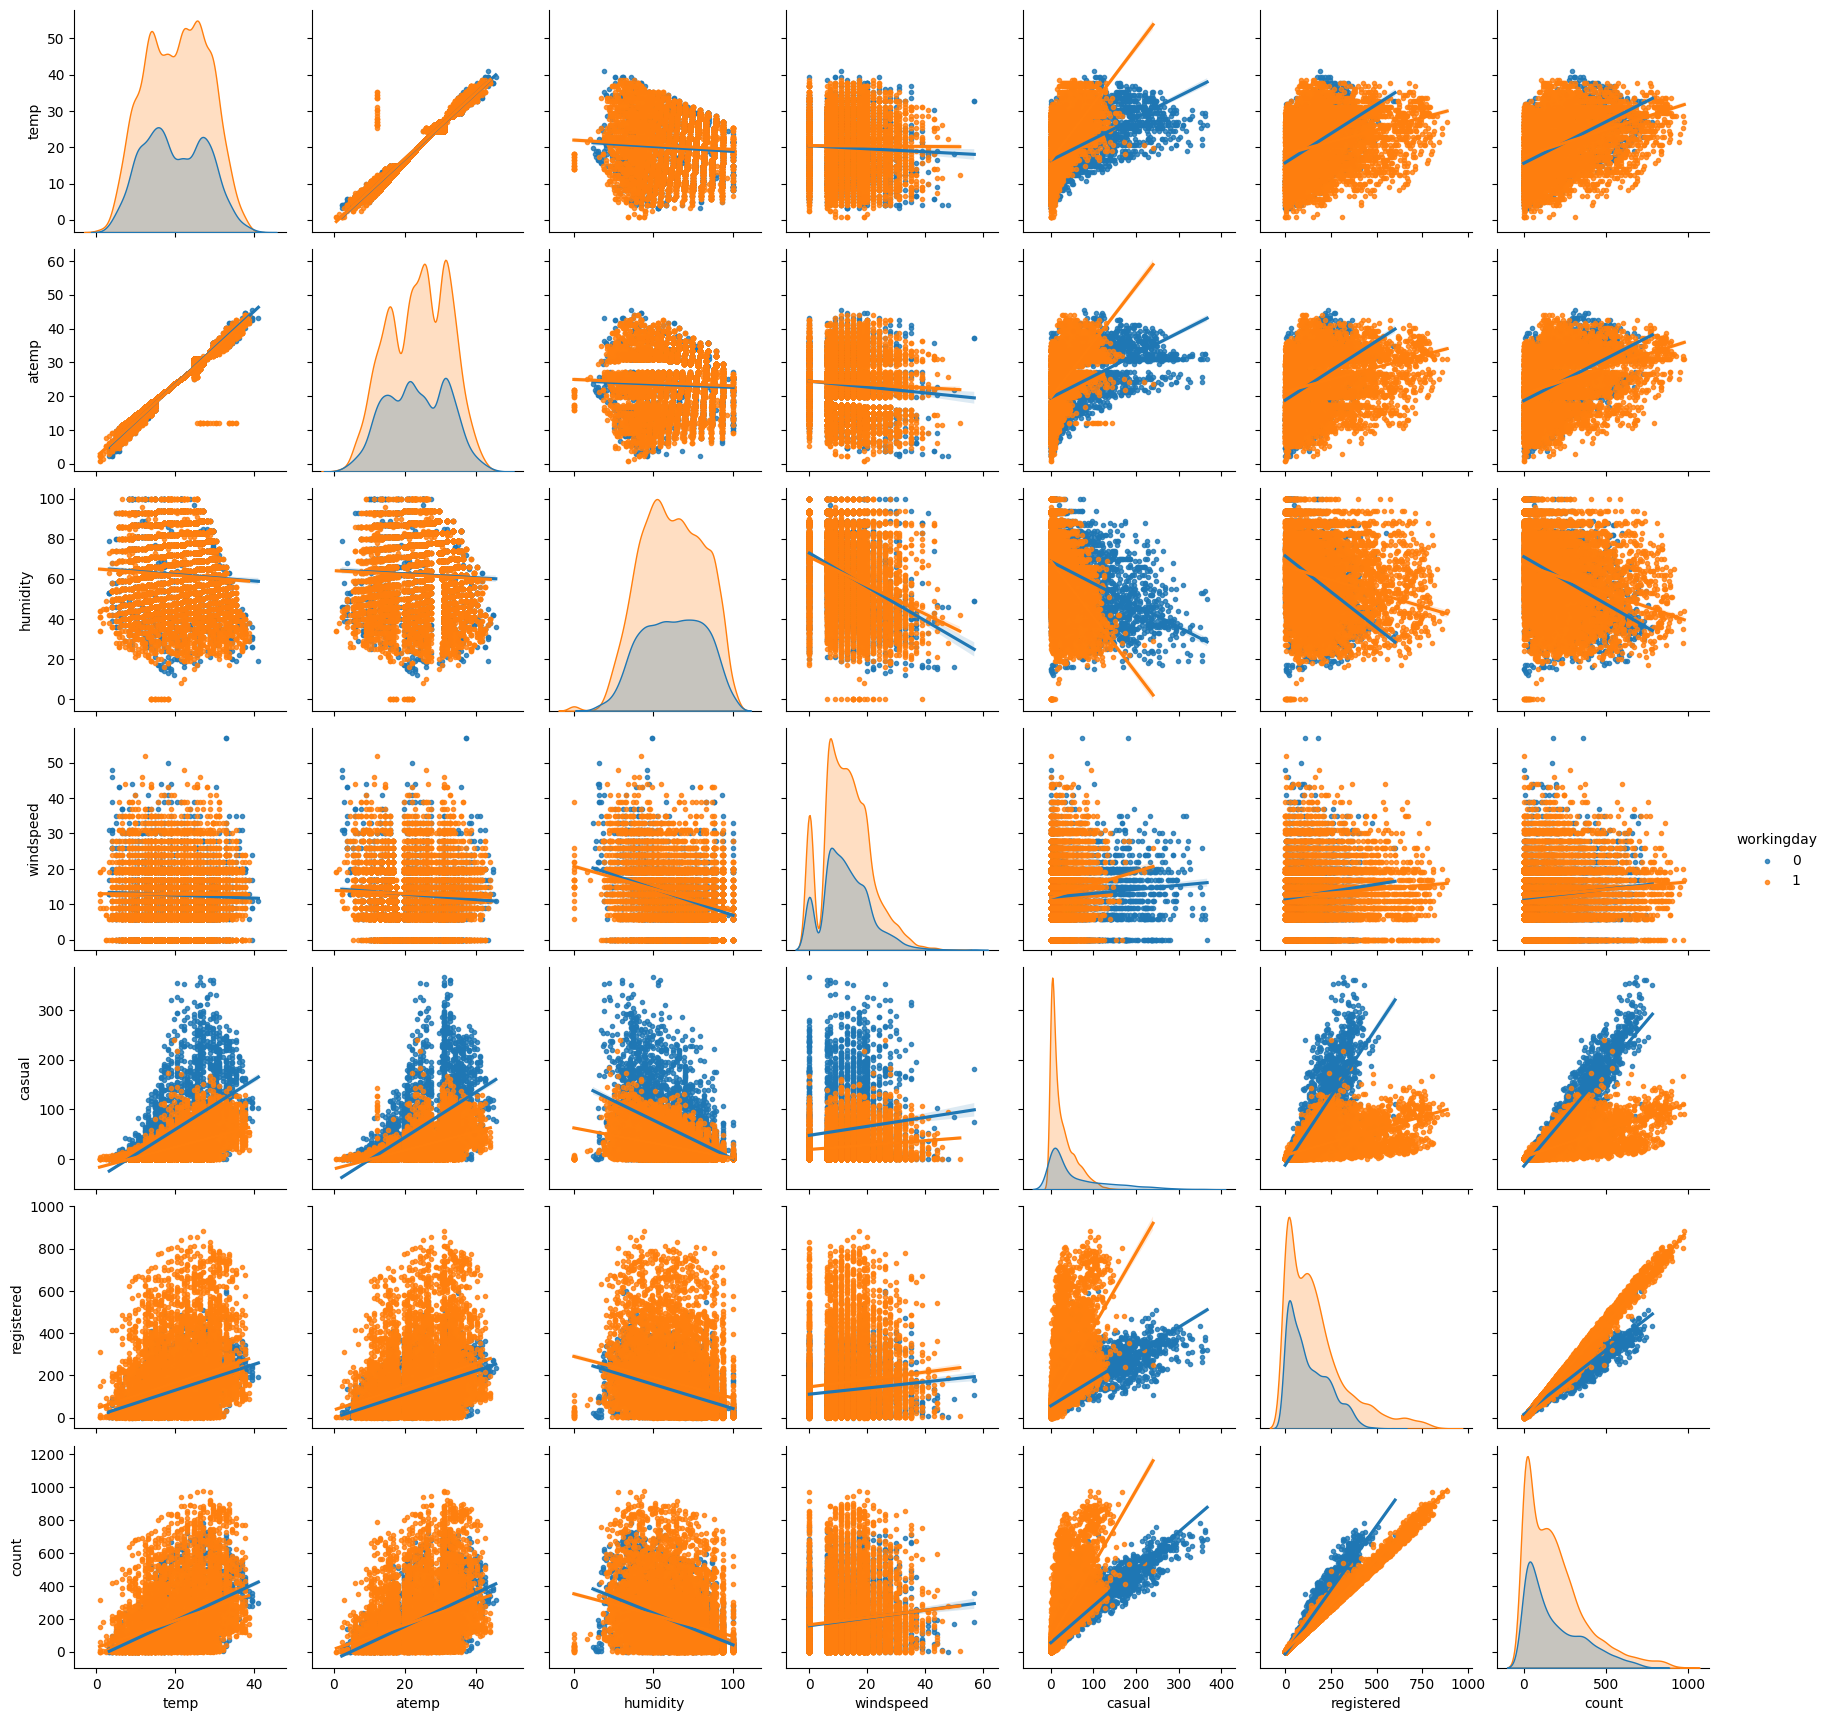

In [69]:
sns.pairplot(data = yulu_df, 
             kind = 'reg',
             hue = 'workingday',
             markers = '.')
plt.plot()

In [70]:
numeric_columns = yulu_df.select_dtypes(include=['number'])
corr_data = numeric_columns.corr()
corr_data

,temp,atemp,humidity,windspeed,casual,registered,count
temp,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948
count,0.394454,0.389784,-0.317371,0.101369,0.690414,0.970948,1.000000


[]

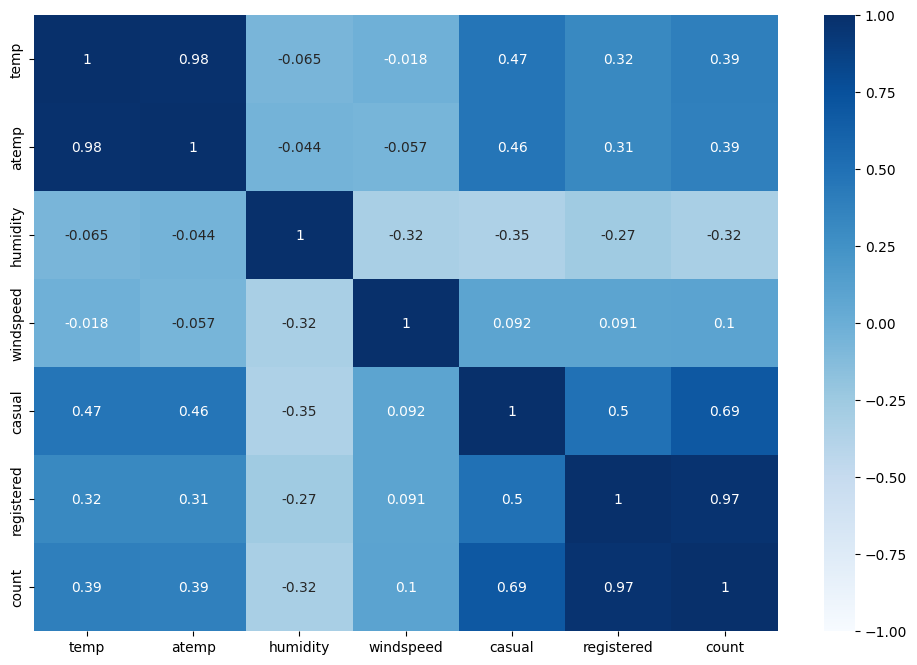

In [71]:
plt.figure(figsize = (12, 8))
sns.heatmap(data = corr_data, cmap = 'Blues', annot = True, vmin = -1, vmax = 1)
plt.plot()

 - Very High Correlation (> 0.9) exists between columns [atemp, temp] and [count, registered] 
 - High positively / negatively correlation (0.7 - 0.9) does not exist between any columns.
 - Moderate positive correlation (0.5 - 0.7) exists between columns [casual, count], [casual, registered].
 - Low Positive correlation (0.3 - 0.5) exists between columns [count, temp], [count, atemp], [casual, atemp]
 - Negligible correlation exists between all other combinations of columns. 

## Insights 

 - The data is given from Timestamp('2011-01-01 00:00:00') to Timestamp('2012-12-19 23:00:00'). The total time period for which the data is given is '718 days 23:00:00'.
 - Out of every 100 users, around 19 are casual users and 81 are registered users.
 - The mean total hourly count of rental bikes is 144 for the year 2011 and 239 for the year 2012. An annual growth rate of 65.41 % can be seen in the demand of electric vehicles on an hourly basis.
 - There is a seasonal pattern in the count of rental bikes, with higher demand during the spring and summer months, a slight decline in the fall, and a further decrease in the winter months.
  - The average hourly count of rental bikes is the lowest in the month of January followed by February and March.
 - There is a distinct fluctuation in count throughout the day, with low counts during early morning hours, a sudden increase in the morning, a peak count in the afternoon, and a gradual decline in the evening and nighttime.
 - More than 80 % of the time, the temperature is less than 28 degrees celcius.
 - More than 80 % of the time, the humidity value is greater than 40. Thus for most of the time, humidity level varies from optimum to too moist.
 - More than 85 % of the total, windspeed data has a value of less than 20.
 - The hourly count of total rental bikes is the highest in the clear and cloudy weather, followed by the misty weather and rainy weather. There are very few records for extreme weather conditions.
 - The mean hourly count of the total rental bikes is statistically similar for both working and non- working days.
 - There is statistically significant dependency of weather and season based on the hourly total number of bikes rented.
 - The hourly total number of rental bikes is statistically different for different weathers.
 - There is no statistically significant dependency of weather 1, 2, 3 on season based on the average hourly total number of bikes rented.
 - The hourly total number of rental bikes is statistically different for different seasons.

## Recommendations

 - **Seasonal Marketing**: Since there is a clear seasonal pattern in the count of rental bikes, Yulu can adjust its marketing strategies accordingly. Focus on promoting bike rentals during the spring and summer months when there is higher demand. Offer seasonal discounts or special packages to attract more customers during these periods.

 - **Time-based Pricing**: Take advantage of the hourly fluctuation in bike rental counts throughout the day. Consider implementing time-based pricing where rental rates are lower during off-peak hours and higher during peak hours. This can encourage customers to rent bikes during less busy times, balancing out the demand and optimizing the resources.

 - **Weather-based Promotions**: Recognize the impact of weather on bike rentals. Create weather-based promotions that target customers during clear and cloudy weather, as these conditions show the highest rental counts. Yulu can offer weather-specific discounts to attract more customers during these favorable weather conditions.

 - **User Segmentation**: Given that around 81% of users are registered, and the remaining 19% are casual, Yulu can tailor its marketing and communication strategies accordingly. Provide loyalty programs, exclusive offers, or personalized recommendations for registered users to encourage repeat business. For casual users, focus on providing a seamless rental experience and promoting the benefits of bike rentals for occasional use.

 - **Optimize Inventory**: Analyze the demand patterns during different months and adjust the inventory accordingly. During months with lower rental counts such as January, February, and March, Yulu can optimize its inventory levels to avoid excess bikes. On the other hand, during peak months, ensure having sufficient bikes available to meet the higher demand.

 - **Improve Weather Data Collection**: Given the lack of records for extreme weather conditions, consider improving the data collection process for such scenarios. Having more data on extreme weather conditions can help to understand customer behavior and adjust the operations accordingly, such as offering specialized bike models for different weather conditions or implementing safety measures during extreme weather.

 - **Customer Comfort**: Since humidity levels are generally high and temperature is often below 28 degrees Celsius, consider providing amenities like umbrellas, rain jackets, or water bottles to enhance the comfort and convenience of the customers. These small touches can contribute to a positive customer experience and encourage repeat business.

 - **Collaborations with Weather Services**: Consider collaborating with weather services to provide real-time weather updates and forecasts to potential customers. Incorporate weather information into your marketing campaigns or rental app to showcase the ideal biking conditions and attract users who prefer certain weather conditions.

 - **Seasonal Bike Maintenance**: Allocate resources for seasonal bike maintenance. Before the peak seasons, conduct thorough maintenance checks on the bike fleet to ensure they are in top condition. Regularly inspect and service bikes throughout the year to prevent breakdowns and maximize customer satisfaction.
 
 - **Customer Feedback and Reviews**: Encourage customers to provide feedback and reviews on their biking experience. Collecting feedback can help identify areas for improvement, understand customer preferences, and tailor the services to better meet customer expectations.
 
 - **Social Media Marketing**: Leverage social media platforms to promote the electric bike rental services. Share captivating visuals of biking experiences in different weather conditions, highlight customer testimonials, and engage with potential customers through interactive posts and contests. Utilize targeted advertising campaigns to reach specific customer segments and drive more bookings.
 
 - **Special Occasion Discounts**: Since Yulu focusses on providing a sustainable solution for vehicular pollution, it should give special discounts on the occassions like Zero Emissions Day (21st September), Earth day (22nd April), World Environment Day (5th June) etc in order to attract new users.
